<a href="https://colab.research.google.com/github/shila-sahoo/cloudxlab-projects/blob/main/amazon_products.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
import os

amazon_data = pd.read_csv('/content/Amazon-Products.csv')
amazon_data.head()

<ipython-input-39-49d56bceece3>:5: DtypeWarning:

Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.



,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4,69,"₹37,990","₹68,990"
4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"


In [40]:
#Removing unnamed column which adds no information to the dataset
amazon_data = amazon_data.drop(columns=['Unnamed: 0'])

amazon_data.shape

(143597, 9)

In [41]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143597 entries, 0 to 143596
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            143597 non-null  object
 1   main_category   143597 non-null  object
 2   sub_category    143597 non-null  object
 3   image           143597 non-null  object
 4   link            143597 non-null  object
 5   ratings         119454 non-null  object
 6   no_of_ratings   119454 non-null  object
 7   discount_price  132542 non-null  object
 8   actual_price    141210 non-null  object
dtypes: object(9)
memory usage: 9.9+ MB


In [42]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143597 entries, 0 to 143596
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            143597 non-null  object
 1   main_category   143597 non-null  object
 2   sub_category    143597 non-null  object
 3   image           143597 non-null  object
 4   link            143597 non-null  object
 5   ratings         119454 non-null  object
 6   no_of_ratings   119454 non-null  object
 7   discount_price  132542 non-null  object
 8   actual_price    141210 non-null  object
dtypes: object(9)
memory usage: 9.9+ MB


In [43]:
#Calculate the no. of datapoints having missing value in each of the column
amazon_data.isnull().sum()

name                  0
main_category         0
sub_category          0
image                 0
link                  0
ratings           24143
no_of_ratings     24143
discount_price    11055
actual_price       2387
dtype: int64

In [44]:
#Remove the rows with missing values
amazon_data=amazon_data.dropna()

In [45]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111683 entries, 0 to 143595
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            111683 non-null  object
 1   main_category   111683 non-null  object
 2   sub_category    111683 non-null  object
 3   image           111683 non-null  object
 4   link            111683 non-null  object
 5   ratings         111683 non-null  object
 6   no_of_ratings   111683 non-null  object
 7   discount_price  111683 non-null  object
 8   actual_price    111683 non-null  object
dtypes: object(9)
memory usage: 8.5+ MB


In [46]:
##Convert ratings to numeric field

#Find the unique values in ratings column
amazon_data['ratings'].unique()

array(['4.2', '4', '4.1', '4.3', '3.9', '3.8', '3.5', '4.6', '3.3', '3.4',
       '3.7', '2.9', '5', '4.4', '3.6', '2.7', '4.5', '3', '3.1', '4.8',
       '4.7', '3.2', '2.5', '1', '2.6', '2.8', '1.7', 'Get', '1.8', '2.4',
       '4.9', '2.2', '1.6', '1.9', '2.3', '2', '1.4', '2.1', 'FREE',
       '1.2', '1.3', '1.5', 3.7, 4.2, 3.8, 3.6, 3.9, 4.1, 3.5, 4.0, 3.2,
       5.0, 4.3, 3.3, 3.4, 4.7, 4.5, 4.4, 4.6, 4.8, 3.1, 3.0, 2.9, 1.7,
       1.9, 2.8, 1.0, 2.4, 2.5, 4.9, 1.6, 2.7, 2.3, 2.0, 2.6, 1.8, 1.4,
       2.2, 1.3, 2.1, 1.5], dtype=object)

In [47]:
# Remove alphanumeric values and change the type to float
amazon_data['ratings'] = amazon_data['ratings'].replace(['Get','FREE','₹68.99', '₹65','₹70', '₹100', '₹99', '₹2.99'], '0.0')
amazon_data['ratings'] = amazon_data["ratings"].astype(float)
amazon_data['ratings'].unique()

array([4.2, 4. , 4.1, 4.3, 3.9, 3.8, 3.5, 4.6, 3.3, 3.4, 3.7, 2.9, 5. ,
       4.4, 3.6, 2.7, 4.5, 3. , 3.1, 4.8, 4.7, 3.2, 2.5, 1. , 2.6, 2.8,
       1.7, 0. , 1.8, 2.4, 4.9, 2.2, 1.6, 1.9, 2.3, 2. , 1.4, 2.1, 1.2,
       1.3, 1.5])

In [48]:
##Convert no_of_ratings to numeric field

#Remove comma from the numeric strings
amazon_data["no_of_ratings"] = amazon_data["no_of_ratings"].str.replace(',', '')
#Convert string to numeric with non-numeric fields as nan
amazon_data["no_of_ratings"] = pd.to_numeric(amazon_data["no_of_ratings"], errors='coerce')
#Remove rows with nan
amazon_data=amazon_data.dropna()

In [49]:
##Convert discount_price and actual_price to numeric fields

# Removing the ₹ sign
amazon_data["discount_price"] = amazon_data["discount_price"].str.replace('₹', '')
amazon_data["actual_price"] = amazon_data["actual_price"].str.replace('₹', '')

# Change commas to dots and change the type to float
amazon_data['discount_price'] = amazon_data["discount_price"].str.replace(',', '').astype(float)
amazon_data['actual_price'] = amazon_data["actual_price"].str.replace(',', '').astype(float)

In [50]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110789 entries, 0 to 143595
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            110789 non-null  object 
 1   main_category   110789 non-null  object 
 2   sub_category    110789 non-null  object 
 3   image           110789 non-null  object 
 4   link            110789 non-null  object 
 5   ratings         110789 non-null  float64
 6   no_of_ratings   110789 non-null  float64
 7   discount_price  110789 non-null  float64
 8   actual_price    110789 non-null  float64
dtypes: float64(4), object(5)
memory usage: 8.5+ MB


In [51]:
#Create a manufacturer field from first word of name column and add it after name
amazon_data['manufacturer'] = amazon_data['name'].str.split(' ').str[0]
cols = amazon_data.columns.tolist()
print(cols)
cols=['name',
 'manufacturer',
 'main_category',
 'sub_category',
 'image',
 'link',
 'ratings',
 'no_of_ratings',
 'discount_price',
 'actual_price',
]
print(cols)
amazon_data = amazon_data[cols]
amazon_data.head()

['name', 'main_category', 'sub_category', 'image', 'link', 'ratings', 'no_of_ratings', 'discount_price', 'actual_price', 'manufacturer']
['name', 'manufacturer', 'main_category', 'sub_category', 'image', 'link', 'ratings', 'no_of_ratings', 'discount_price', 'actual_price']


,name,manufacturer,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,Lloyd,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,2255.0,32999.0,58990.0
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,LG,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,2948.0,46490.0,75990.0
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,LG,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,1206.0,34490.0,61990.0
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,LG,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69.0,37990.0,68990.0
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,Carrier,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630.0,34490.0,67790.0


In [52]:
# Create a net discount column and discount percent
amazon_data['discount_value'] = amazon_data['actual_price'] - amazon_data['discount_price']
amazon_data['discount_percent'] = 1 - amazon_data['discount_price']/amazon_data['actual_price']

amazon_data.head()

,name,manufacturer,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,discount_value,discount_percent
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,Lloyd,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,2255.0,32999.0,58990.0,25991.0,0.440600
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,LG,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,2948.0,46490.0,75990.0,29500.0,0.388209
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,LG,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,1206.0,34490.0,61990.0,27500.0,0.443620
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,LG,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69.0,37990.0,68990.0,31000.0,0.449340
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,Carrier,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630.0,34490.0,67790.0,33300.0,0.491223


In [53]:
# Detail of the maximum priced item
amazon_data[amazon_data["actual_price"] == amazon_data["actual_price"].max()]

,name,manufacturer,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,discount_value,discount_percent
73356,Canon EOS 5D Mark IV 30.4 MP Digital SLR Camer...,Canon,"tv, audio & cameras",Cameras,https://m.media-amazon.com/images/I/71tTLhIWn+...,https://www.amazon.in/Canon-Digital-Camera-24-...,4.5,125.0,371980.0,412995.0,41015.0,0.099311


In [54]:
# Detail of the items sold with minimum discount
amazon_data[amazon_data["discount_value"] == amazon_data["discount_value"].min()]

,name,manufacturer,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,discount_value,discount_percent
28279,Aristocrat Dual Edge 65cm Polycarbonate & Poly...,Aristocrat,stores,Amazon Fashion,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Aristocrat-Polycarbonate...,4.2,508.0,2823.0,2823.05,0.05,0.000018
38933,Aristocrat Polyester Hard 66 Cms Luggage- Suit...,Aristocrat,accessories,Bags & Luggage,https://m.media-amazon.com/images/I/71aj5RGIGu...,https://www.amazon.in/Aristocrat-Polycarbonate...,4.3,118.0,2823.0,2823.05,0.05,0.000018


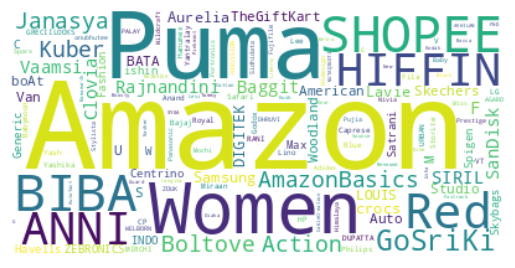

In [55]:
#Explore manufacturers according to number of its products sold in Amazon

import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Creating the text variable
text = " ".join(manufacturer for manufacturer in amazon_data.manufacturer)
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [56]:
#Popular manufacturers - top 10
import plotly.express as px

values = amazon_data["manufacturer"].value_counts().keys().tolist()[:10]
counts = amazon_data["manufacturer"].value_counts().tolist()[:10]
fig = px.bar(amazon_data, y = counts, x = values, color_discrete_sequence = ["#EC2781"] * len(amazon_data))

fig.update_layout(plot_bgcolor = "#ECECEC",
                  yaxis_title = "Count",
                  xaxis_title = "Name of Manufacturers",
                  title = "<b>Popular Manufacturers Category</b>"
                 )
fig.show()

In [57]:
# Different main categories present
amazon_data["main_category"].unique()

array(['appliances', 'car & motorbike', 'tv, audio & cameras',
       'sports & fitness', 'grocery & gourmet foods', 'home & kitchen',
       'pet supplies', 'stores', 'toys & baby products', "kids' fashion",
       'bags & luggage', 'accessories', "women's shoes",
       'beauty & health', "men's shoes", "women's clothing"], dtype=object)

In [63]:
# Explore main categories of products sold in Amazon
#fig = px.bar(amazon_data, "main_category")
fig = px.bar(amazon_data, "main_category")
fig.update_layout(
                 plot_bgcolor = "#ECECEC",
                  yaxis_title = "Count",
                  xaxis_title = "Main Categories",
                  title = "<b>Count of Main Categories of Products</b>"
                 )
fig.show()

In [59]:
# Popular subcategories
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)
frame_sub = amazon_data[["main_category", "sub_category"]].groupby("main_category").count()
frame_sub.style.background_gradient(cmap=cm)

,sub_category
main_category,
accessories,15961
appliances,9019
bags & luggage,473
beauty & health,2694
car & motorbike,4281
grocery & gourmet foods,1562
home & kitchen,2089
kids' fashion,1207
men's shoes,10184


In [60]:
# Rating of the products
print("The average rating: ",amazon_data["ratings"].unique())

print("The average price: ", amazon_data["actual_price"].mean())

The average rating:  [4.2 4.  4.1 4.3 3.9 3.8 3.5 4.6 3.3 3.4 3.7 2.9 5.  4.4 3.6 2.7 4.5 3.
 3.1 4.8 4.7 3.2 2.5 1.  2.6 2.8 1.7 1.8 2.4 4.9 2.2 1.6 1.9 2.3 2.  1.4
 2.1 1.2 1.3 1.5]
The average price:  3316.970966431685


In [61]:
#Price distribution of all items sold at Amazon

import plotly.figure_factory as ff
x = amazon_data["actual_price"]
hist_data = [x]
group_labels = ['actual_price']

fig = ff.create_distplot(hist_data, group_labels, show_rug = False, colors=["#ffd514"])
fig.update_layout(plot_bgcolor = "#ECECEC",
                  title = "<b>Price Distribution of Data</b>"
                 )
fig.show()

In [62]:
# Statistics of the actual_price column of products
amazon_data.actual_price.describe()

count    110789.000000
mean       3316.970966
std        8207.424924
min          10.000000
25%         899.000000
50%        1499.000000
75%        2999.000000
max      412995.000000
Name: actual_price, dtype: float64